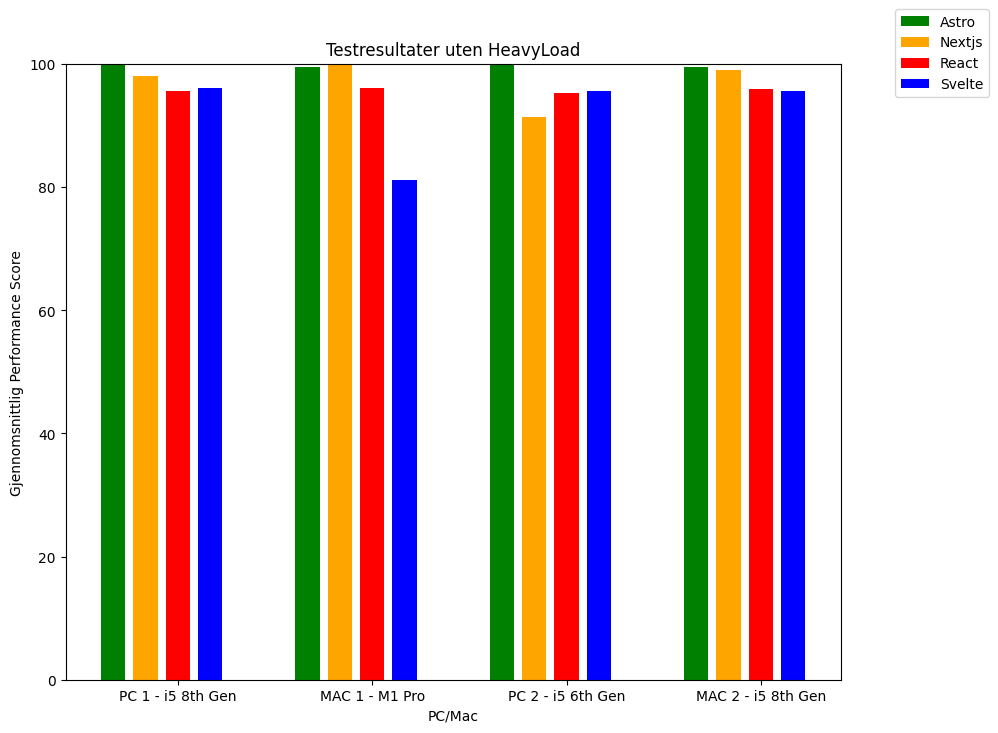

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Navnene på CSV-filene
filenames = ['Aleksander_Resultater.csv', 'Maja_Resultater.csv', 'Vegard_Resultater.csv', 'Fredrik_Resultater.csv']

# App-navn og tilsvarende farger
app_names = ['Astro', 'Nextjs', 'React', 'Svelte']
colors = ['green', 'orange', 'red', 'blue']  # Endret fargekoder

# Oppretter et tom dictionary for å holde på gjennomsnittskårene
app_avg_score = {}

# Leser hver fil og beregner gjennomsnittskårene
for filename in filenames:
    df = pd.read_csv(filename, sep=';', encoding='ISO-8859-1')
    df_avg_score = df.groupby('App')['Performance Score'].mean()
    
    # Legger til gjennomsnittskårene i dictionary
    for app in app_names:
        if app not in app_avg_score:
            app_avg_score[app] = []
        app_avg_score[app].append(df_avg_score[app])

# Plotter gjennomsnittskårene
plt.figure(figsize=(10, 8))

# Lager et bar plot for hver app
bar_width = 0.15  # Reduserer barbredden for å lage større mellomrom mellom PC-ene
spacing = 0.2  # Mellomrom mellom hver PC-gruppe

for i, app in enumerate(app_names):
    plt.bar(np.arange(len(filenames)) + spacing * np.arange(len(filenames)) + i*(bar_width + 0.05), app_avg_score[app], color=colors[i], width=bar_width, label=app)

plt.title('Testresultater uten HeavyLoad') #Tittel 
plt.xlabel('PC/Mac') #Beskriver x-Aksen
plt.ylabel('Gjennomsnittlig Performance Score') #Beskriver y-aksen
plt.xticks(np.arange(len(filenames)) + spacing * np.arange(len(filenames)) + 0.5*(bar_width + 0.05)*len(app_names), ['PC 1 - i5 8th Gen', 'MAC 1 - M1 Pro', 'PC 2 - i5 6th Gen', 'MAC 2 - i5 8th Gen'])
plt.ylim(0, 100) #Setter y-aksens øvre grense til 100
plt.legend(bbox_to_anchor=(1.2, 1.1), loc='upper right') #Plasserer legend (boksen med fargekodene) utenfor grafene

plt.show()
